In [ ]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 1.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
!pip install -q vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.6 MB/s eta 0:00:00


In [ ]:
!pip install pandas

In [ ]:
import pandas as pd
import spacy #load spacy
from sklearn.model_selection import train_test_split
nlp = spacy.load("en_core_web_lg")
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn import svm
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
review_table = pd.read_csv('/content/drive/MyDrive/CIS 509/yelp_dataset/Final_Data/review_table.csv')
review_table

<ipython-input-6-f79458f43f74>:1: DtypeWarning: Columns (89,90,102,109) have mixed types. Specify dtype option on import or set low_memory=False.
  review_table = pd.read_csv('/content/drive/MyDrive/CIS 509/yelp_dataset/Final_Data/review_table.csv')


,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,...,BYOBCorkage,DriveThru,review_id,user_id,stars_y,useful,funny,cool,text,date
0,cxupofYLq46bxBHpKyFwsQ,Wyndham New Orleans - French Quarter,124 Royal Street,New Orleans,LA,70130.0,29.953713,-90.068526,3.0,266.0,...,NaN,NaN,xlK3ZAQrdy3xE7IpRL_Ucg,UG7f60WHPvWLUcGPIbm2ZA,2.0,2.0,1.0,1.0,"This hotel is bad, borderline mediocre. Of cou...",2014-08-24 19:33:12
1,cxupofYLq46bxBHpKyFwsQ,Wyndham New Orleans - French Quarter,124 Royal Street,New Orleans,LA,70130.0,29.953713,-90.068526,3.0,266.0,...,NaN,NaN,_dNI9YgOU9S0CCK16taQzQ,LHUrjf1H_ZLoqriutWEAeA,1.0,1.0,0.0,0.0,Had booked rooms a month in advance for a bach...,2014-03-14 20:25:53
2,hkh5iyDeGLNhu-JUQFRE1Q,Royal Sonesta New Orleans,300 Bourbon St,New Orleans,LA,70130.0,29.955761,-90.067887,3.5,492.0,...,NaN,NaN,Yn_RJRSvv0K6Ewh0Dy_9uQ,QZNEWt07tOTKh86oBUSwnA,2.0,6.0,0.0,1.0,"This hotel seems very nice in the lobby, but t...",2012-09-10 18:42:46
3,hkh5iyDeGLNhu-JUQFRE1Q,Royal Sonesta New Orleans,300 Bourbon St,New Orleans,LA,70130.0,29.955761,-90.067887,3.5,492.0,...,NaN,NaN,t6qCL6n8VOMLQIYy1GgG8g,0cH1enc41HLNuBFizzDEsw,5.0,2.0,0.0,0.0,Understand first that this was a party trip wi...,2012-12-05 19:22:23
4,hkh5iyDeGLNhu-JUQFRE1Q,Royal Sonesta New Orleans,300 Bourbon St,New Orleans,LA,70130.0,29.955761,-90.067887,3.5,492.0,...,NaN,NaN,3J0DcFukAxpmR9JXByAxFA,Gb8xOaeWE1cLMRZUHWfvKQ,5.0,3.0,1.0,0.0,A group of 12 girls and I came here for a Bach...,2014-09-25 15:57:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16197,I_FKWKPVpGts4q_HzJ-0mQ,"The Ritz-Carlton, New Orleans",921 Canal St,New Orleans,LA,70112.0,29.955041,-90.071079,4.0,413.0,...,NaN,NaN,-U7N5jgLSjKzpug_2EvdgQ,MQb4_RgMz2nvEM_P8p1NrA,4.0,1.0,0.0,0.0,I am very glad that I stayed here on my recent...,2018-12-30 14:57:47
16198,UIwItjBCjCKF4nDNVBzVIQ,Super 8 by Wyndham New Orleans,"6322 Chef Menteur Highway, I-10 Exit 240 B",New Orleans,LA,70126.0,30.010096,-90.014538,3.5,58.0,...,NaN,NaN,lUaG7KEUR6sPF4lg8WOSHA,RT9abp-FMe21pBD8PPFtUg,3.0,1.0,0.0,1.0,We booked this hotel for me and my bestie to s...,2019-03-10 18:40:51
16199,h1J_GWV5yZ-gXUtsplvI8g,Omni Riverfront Hotel,701 Convention Center Blvd,New Orleans,LA,70130.0,29.945554,-90.064893,3.5,116.0,...,NaN,NaN,VQYbQpoOTobmKqPs4r2xsA,ldkOeC_ionczQdTTv7954g,2.0,10.0,8.0,3.0,Since this hotel is right across the street fr...,2014-12-07 21:14:07
16200,u-wkhjV7CfvGJVY7hGULjw,Hilton New Orleans Riverside,2 Poydras St,New Orleans,LA,70130.0,29.947506,-90.063454,3.0,559.0,...,NaN,NaN,YhTMKj4EgifMV0PD0TlLNw,APwpzHx7Jm91ohPx7dyUMw,4.0,2.0,0.0,0.0,We stayed at the Hilton New Orleans Riverside ...,2019-07-11 17:21:00


In [ ]:
def normalize(review, lowercase, remove_stopwords):
    if lowercase:
        review = review.lower()
    doc = nlp(review)
    lemmatized = list()
    for token in doc:
        if not remove_stopwords or (remove_stopwords and not token.is_stop):
            lemmatized.append(token.lemma_)
    return " ".join(lemmatized)

In [ ]:
review_table['processed'] = review_table['text'].apply(normalize, lowercase=True, remove_stopwords=True)

In [ ]:
sentiment = SentimentIntensityAnalyzer()
review_table['compound'] = [sentiment.polarity_scores(x)['compound'] for x in review_table['processed']]
review_table['neg'] = [sentiment.polarity_scores(x)['neg'] for x in review_table['processed']]
review_table['neu'] = [sentiment.polarity_scores(x)['neu'] for x in review_table['processed']]
review_table['pos'] = [sentiment.polarity_scores(x)['pos'] for x in review_table['processed']]

In [ ]:
review_table

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,...,useful,funny,cool,text,date,processed,compound,neg,neu,pos
0,cxupofYLq46bxBHpKyFwsQ,Wyndham New Orleans - French Quarter,124 Royal Street,New Orleans,LA,70130.0,29.953713,-90.068526,3.0,266.0,...,2.0,1.0,1.0,"This hotel is bad, borderline mediocre. Of cou...",2014-08-24 19:33:12,"hotel bad , borderline mediocre . course , hot...",0.8979,0.103,0.715,0.182
1,cxupofYLq46bxBHpKyFwsQ,Wyndham New Orleans - French Quarter,124 Royal Street,New Orleans,LA,70130.0,29.953713,-90.068526,3.0,266.0,...,1.0,0.0,0.0,Had booked rooms a month in advance for a bach...,2014-03-14 20:25:53,book room month advance bachelor party . wait ...,0.2280,0.083,0.785,0.132
2,hkh5iyDeGLNhu-JUQFRE1Q,Royal Sonesta New Orleans,300 Bourbon St,New Orleans,LA,70130.0,29.955761,-90.067887,3.5,492.0,...,6.0,0.0,1.0,"This hotel seems very nice in the lobby, but t...",2012-09-10 18:42:46,"hotel nice lobby , room sub - par . locate 5th...",0.9571,0.079,0.633,0.288
3,hkh5iyDeGLNhu-JUQFRE1Q,Royal Sonesta New Orleans,300 Bourbon St,New Orleans,LA,70130.0,29.955761,-90.067887,3.5,492.0,...,2.0,0.0,0.0,Understand first that this was a party trip wi...,2012-12-05 19:22:23,understand party trip buddy review hotel littl...,0.9864,0.029,0.694,0.277
4,hkh5iyDeGLNhu-JUQFRE1Q,Royal Sonesta New Orleans,300 Bourbon St,New Orleans,LA,70130.0,29.955761,-90.067887,3.5,492.0,...,3.0,1.0,0.0,A group of 12 girls and I came here for a Bach...,2014-09-25 15:57:00,group 12 girl come bachelorette party bedroom ...,0.9870,0.070,0.641,0.289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16197,I_FKWKPVpGts4q_HzJ-0mQ,"The Ritz-Carlton, New Orleans",921 Canal St,New Orleans,LA,70112.0,29.955041,-90.071079,4.0,413.0,...,1.0,0.0,0.0,I am very glad that I stayed here on my recent...,2018-12-30 14:57:47,glad stay recent trip new orleans . get great ...,0.9883,0.050,0.674,0.276
16198,UIwItjBCjCKF4nDNVBzVIQ,Super 8 by Wyndham New Orleans,"6322 Chef Menteur Highway, I-10 Exit 240 B",New Orleans,LA,70126.0,30.010096,-90.014538,3.5,58.0,...,1.0,0.0,1.0,We booked this hotel for me and my bestie to s...,2019-03-10 18:40:51,book hotel bestie stay week visit nola . plus ...,0.9957,0.096,0.680,0.224
16199,h1J_GWV5yZ-gXUtsplvI8g,Omni Riverfront Hotel,701 Convention Center Blvd,New Orleans,LA,70130.0,29.945554,-90.064893,3.5,116.0,...,10.0,8.0,3.0,Since this hotel is right across the street fr...,2014-12-07 21:14:07,"hotel right street convention center , opt sta...",-0.4243,0.126,0.731,0.143
16200,u-wkhjV7CfvGJVY7hGULjw,Hilton New Orleans Riverside,2 Poydras St,New Orleans,LA,70130.0,29.947506,-90.063454,3.0,559.0,...,2.0,0.0,0.0,We stayed at the Hilton New Orleans Riverside ...,2019-07-11 17:21:00,stay hilton new orleans riverside essence fest...,0.9732,0.000,0.707,0.293


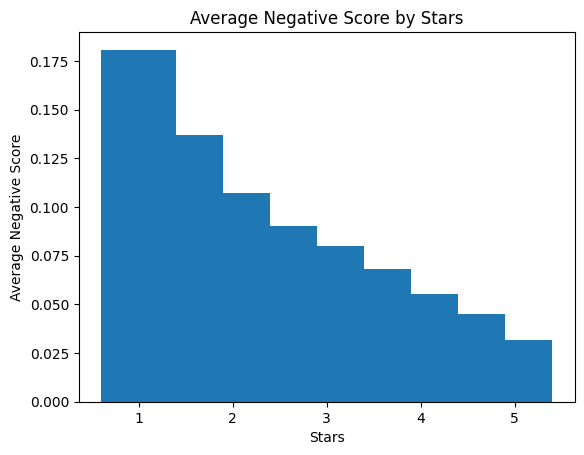

In [ ]:
average = review_table.groupby('stars_x')['neg'].mean().reset_index()
plt.bar(average['stars_x'], average['neg'])

plt.title('Average Negative Score by Stars')
plt.xlabel('Stars')
plt.ylabel('Average Negative Score')

# Display the plot
plt.show()

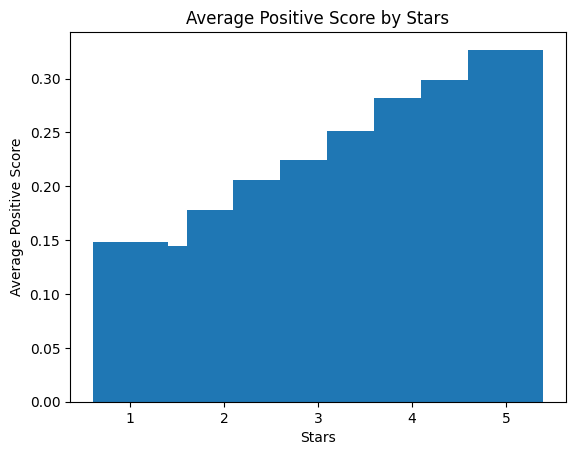

In [ ]:
average = review_table.groupby('stars_x')['pos'].mean().reset_index()
plt.bar(average['stars_x'], average['pos'])

plt.title('Average Positive Score by Stars')
plt.xlabel('Stars')
plt.ylabel('Average Positive Score')

# Display the plot
plt.show()

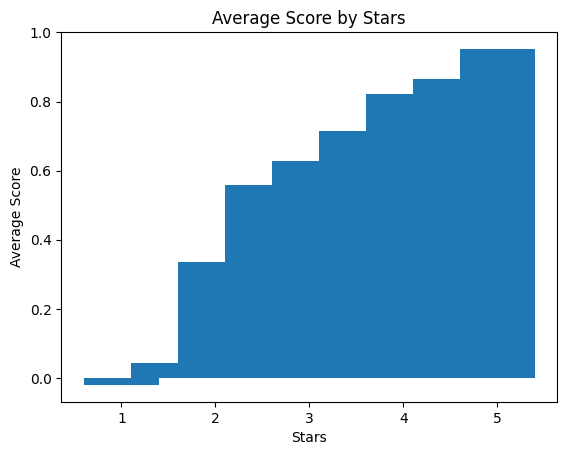

In [ ]:
average = review_table.groupby('stars_x')['compound'].mean().reset_index()
plt.bar(average['stars_x'], average['compound'])

plt.title('Average Score by Stars')
plt.xlabel('Stars')
plt.ylabel('Average Score')

# Display the plot
plt.show()

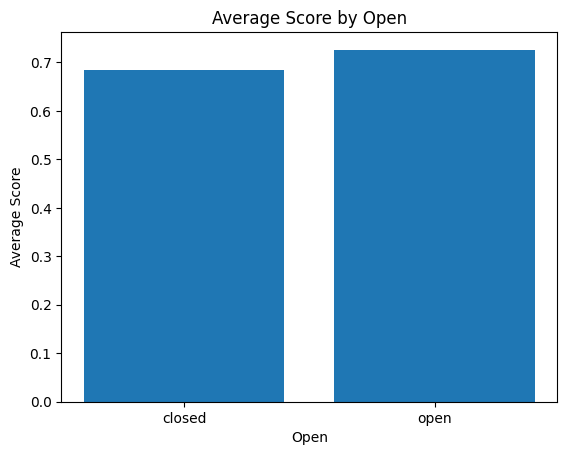

In [ ]:
average = review_table.groupby('is_open')['compound'].mean().reset_index()
plt.bar(average['is_open'], average['compound'])

plt.xticks([0, 1], ['closed', 'open'])

plt.title('Average Score by Open')
plt.xlabel('Open')
plt.ylabel('Average Score')

# Display the plot
plt.show()

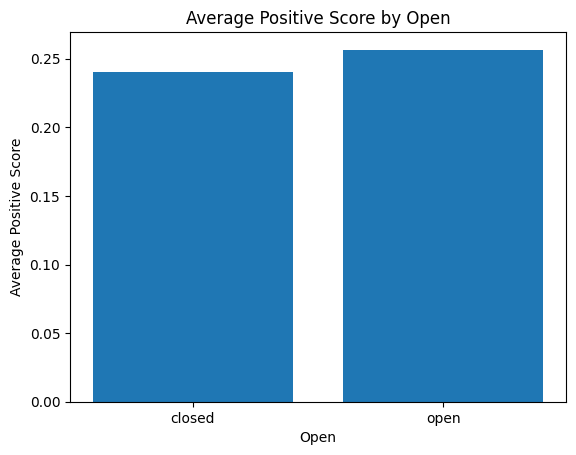

In [ ]:
average = review_table.groupby('is_open')['pos'].mean().reset_index()
plt.bar(average['is_open'], average['pos'])

plt.xticks([0, 1], ['closed', 'open'])

plt.title('Average Positive Score by Open')
plt.xlabel('Open')
plt.ylabel('Average Positive Score')

# Display the plot
plt.show()

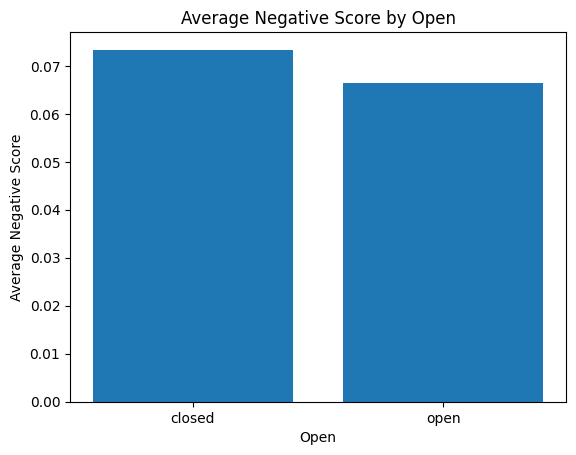

In [ ]:
average = review_table.groupby('is_open')['neg'].mean().reset_index()
plt.bar(average['is_open'], average['neg'])
plt.xticks([0, 1], ['closed', 'open'])

plt.title('Average Negative Score by Open')
plt.xlabel('Open')
plt.ylabel('Average Negative Score')

# Display the plot
plt.show()

In [ ]:
distinct_postal_codes=review_table['postal_code'].unique()

In [ ]:
distinct_postal_codes

array([70130., 70116., 70112., 70128., 70127., 70115., 70117., 70118.,
       70121., 70119., 70126., 70113., 70123., 70125., 70114., 70124.])

In [ ]:
sorted_average['postal_code']

9     70123.0
13    70127.0
6     70118.0
12    70126.0
7     70119.0
2     70114.0
14    70128.0
1     70113.0
8     70121.0
15    70130.0
0     70112.0
4     70116.0
5     70117.0
3     70115.0
11    70125.0
10    70124.0
Name: postal_code, dtype: float64

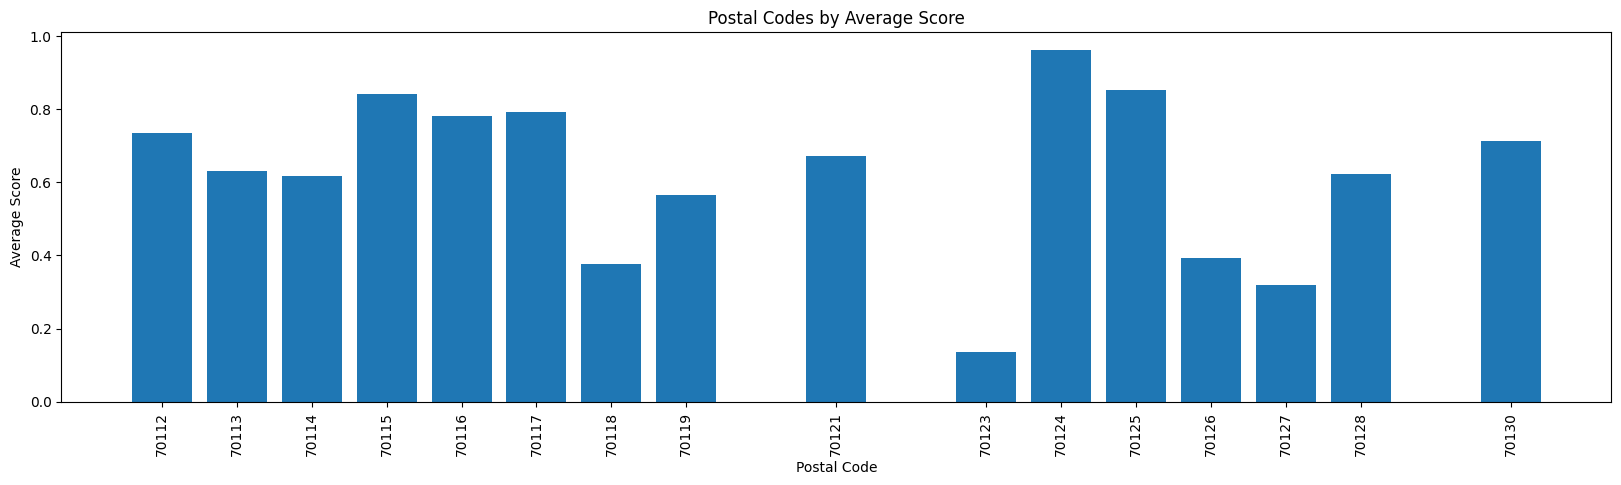

In [ ]:
sorted_average = review_table.groupby('postal_code')['compound'].mean().reset_index().sort_values('compound', ascending=True)

# Create a bar chart
plt.bar(sorted_average['postal_code'], sorted_average['compound'])
plt.xticks(ticks= sorted_average['postal_code'], labels=sorted_average['postal_code'].astype(int),rotation=90)

# Add title and axis labels
plt.title('Postal Codes by Average Score')
plt.xlabel('Postal Code')
plt.ylabel('Average Score')
plt.gcf().set_figwidth(20)

# Display the plot
plt.show()

In [ ]:
sorted_average

,postal_code,compound
9,70123.0,0.136517
13,70127.0,0.318678
6,70118.0,0.376679
12,70126.0,0.391942
7,70119.0,0.566290
2,70114.0,0.617535
14,70128.0,0.623149
1,70113.0,0.630331
8,70121.0,0.670814
15,70130.0,0.712296


In [ ]:
review_table

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,...,useful,funny,cool,text,date,processed,compound,neg,neu,pos
0,cxupofYLq46bxBHpKyFwsQ,Wyndham New Orleans - French Quarter,124 Royal Street,New Orleans,LA,70130.0,29.953713,-90.068526,3.0,266.0,...,2.0,1.0,1.0,"This hotel is bad, borderline mediocre. Of cou...",2014-08-24 19:33:12,"hotel bad , borderline mediocre . course , hot...",0.8979,0.103,0.715,0.182
1,cxupofYLq46bxBHpKyFwsQ,Wyndham New Orleans - French Quarter,124 Royal Street,New Orleans,LA,70130.0,29.953713,-90.068526,3.0,266.0,...,1.0,0.0,0.0,Had booked rooms a month in advance for a bach...,2014-03-14 20:25:53,book room month advance bachelor party . wait ...,0.2280,0.083,0.785,0.132
2,hkh5iyDeGLNhu-JUQFRE1Q,Royal Sonesta New Orleans,300 Bourbon St,New Orleans,LA,70130.0,29.955761,-90.067887,3.5,492.0,...,6.0,0.0,1.0,"This hotel seems very nice in the lobby, but t...",2012-09-10 18:42:46,"hotel nice lobby , room sub - par . locate 5th...",0.9571,0.079,0.633,0.288
3,hkh5iyDeGLNhu-JUQFRE1Q,Royal Sonesta New Orleans,300 Bourbon St,New Orleans,LA,70130.0,29.955761,-90.067887,3.5,492.0,...,2.0,0.0,0.0,Understand first that this was a party trip wi...,2012-12-05 19:22:23,understand party trip buddy review hotel littl...,0.9864,0.029,0.694,0.277
4,hkh5iyDeGLNhu-JUQFRE1Q,Royal Sonesta New Orleans,300 Bourbon St,New Orleans,LA,70130.0,29.955761,-90.067887,3.5,492.0,...,3.0,1.0,0.0,A group of 12 girls and I came here for a Bach...,2014-09-25 15:57:00,group 12 girl come bachelorette party bedroom ...,0.9870,0.070,0.641,0.289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16197,I_FKWKPVpGts4q_HzJ-0mQ,"The Ritz-Carlton, New Orleans",921 Canal St,New Orleans,LA,70112.0,29.955041,-90.071079,4.0,413.0,...,1.0,0.0,0.0,I am very glad that I stayed here on my recent...,2018-12-30 14:57:47,glad stay recent trip new orleans . get great ...,0.9883,0.050,0.674,0.276
16198,UIwItjBCjCKF4nDNVBzVIQ,Super 8 by Wyndham New Orleans,"6322 Chef Menteur Highway, I-10 Exit 240 B",New Orleans,LA,70126.0,30.010096,-90.014538,3.5,58.0,...,1.0,0.0,1.0,We booked this hotel for me and my bestie to s...,2019-03-10 18:40:51,book hotel bestie stay week visit nola . plus ...,0.9957,0.096,0.680,0.224
16199,h1J_GWV5yZ-gXUtsplvI8g,Omni Riverfront Hotel,701 Convention Center Blvd,New Orleans,LA,70130.0,29.945554,-90.064893,3.5,116.0,...,10.0,8.0,3.0,Since this hotel is right across the street fr...,2014-12-07 21:14:07,"hotel right street convention center , opt sta...",-0.4243,0.126,0.731,0.143
16200,u-wkhjV7CfvGJVY7hGULjw,Hilton New Orleans Riverside,2 Poydras St,New Orleans,LA,70130.0,29.947506,-90.063454,3.0,559.0,...,2.0,0.0,0.0,We stayed at the Hilton New Orleans Riverside ...,2019-07-11 17:21:00,stay hilton new orleans riverside essence fest...,0.9732,0.000,0.707,0.293


In [ ]:
def map_stars_to_sentiment(row):
    if row['stars_x'] == 1:
        return 0
    elif row['stars_x'] == 1.5:
        return 0
    elif row['stars_x'] == 2:
        return 0
    elif row['stars_x'] == 2.5:
        return 0
    elif row['stars_x'] == 3:
        return 0
    elif row['stars_x'] == 3.5:
        return 1
    elif row['stars_x'] == 4:
        return 1
    elif row['stars_x'] == 4.5:
        return 1
    elif row['stars_x'] == 5:
        return 1

review_table['label']= review_table.apply(map_stars_to_sentiment, axis=1)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(review_table['processed'], review_table['label'], test_size=0.2, random_state=5)

## Count Vectorizer

In [ ]:
token = RegexpTokenizer(r'[a-zA-Z]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize, max_features = 800)
#cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize, max_features = 3000, binary = True)
X_train_vect = cv.fit_transform(X_train)
X_train_vect.shape

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(12961, 800)

In [ ]:
df = pd.DataFrame(X_train_vect.toarray(), columns=cv.get_feature_names_out())
df.head()

,able,absolutely,ac,access,accommodate,accommodating,accommodation,action,actually,add,...,work,world,worth,wow,write,wrong,year,yelp,yes,young
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
cv.vocabulary_

{'conference': 158,
 'minute': 460,
 'know': 390,
 'main': 433,
 'hotel': 355,
 'book': 75,
 'glad': 306,
 'decide': 197,
 'stay': 682,
 'price': 547,
 'atmosphere': 31,
 'fun': 298,
 'accommodation': 6,
 'comfortable': 147,
 'like': 404,
 'cafe': 100,
 'downstairs': 223,
 'staff': 673,
 'bit': 68,
 'hard': 332,
 'sleep': 650,
 'hear': 335,
 'people': 517,
 'trolley': 735,
 'view': 758,
 'fantastic': 265,
 'day': 194,
 'night': 481,
 'let': 399,
 'picture': 526,
 'place': 528,
 'feature': 269,
 'local': 413,
 'lobby': 412,
 'modern': 463,
 'furniture': 299,
 'blow': 73,
 'away': 40,
 'room': 606,
 'standard': 677,
 'king': 387,
 'sweet': 703,
 'love': 424,
 'decor': 198,
 'absolutely': 1,
 'great': 312,
 'street': 690,
 'busy': 95,
 'noise': 482,
 'huge': 359,
 'include': 368,
 'fridge': 293,
 'coffee': 143,
 'maker': 437,
 'extremely': 255,
 'helpful': 339,
 'friendly': 295,
 'offer': 491,
 'valet': 755,
 'service': 630,
 'use': 752,
 'restaurant': 596,
 'breakfast': 87,
 'dinner': 21

In [ ]:
X_test_vect= cv.transform(X_test)
X_test_vect.shape

(3241, 800)

## Naive Bayes Classification

In [ ]:
MNB = MultinomialNB()
MNB.fit(X_train_vect, Y_train)

MultinomialNB()

In [ ]:
predicted = MNB.predict(X_test_vect)
performance = metrics.classification_report(Y_test,predicted, target_names= ['0', '1'])
print(performance)

              precision    recall  f1-score   support

           0       0.52      0.66      0.58       994
           1       0.83      0.73      0.78      2247

    accuracy                           0.71      3241
   macro avg       0.68      0.70      0.68      3241
weighted avg       0.74      0.71      0.72      3241



## Support Vector Machines (SVM) classification

In [ ]:
clf = svm.SVC()
clf.fit(X_train_vect, Y_train)

SVC()

In [ ]:
predicted = clf.predict(X_test_vect)
performance = metrics.classification_report(Y_test,predicted, target_names= ['0', '1'])
print(performance)

              precision    recall  f1-score   support

           0       0.68      0.30      0.42       994
           1       0.75      0.94      0.83      2247

    accuracy                           0.74      3241
   macro avg       0.71      0.62      0.62      3241
weighted avg       0.73      0.74      0.71      3241



## VaderSentiment

In [ ]:
v_predicted = []
for text in X_test:
  sent= sentiment.polarity_scores(text)
  if sent['compound']>0:
    v_predicted.append(1)
  else:
    v_predicted.append(0)
v_performance = metrics.classification_report(Y_test,v_predicted, target_names= ['0', '1'])
print(v_performance)

              precision    recall  f1-score   support

           0       0.50      0.21      0.30       994
           1       0.72      0.91      0.80      2247

    accuracy                           0.69      3241
   macro avg       0.61      0.56      0.55      3241
weighted avg       0.66      0.69      0.65      3241



## TF-IDF

In [ ]:
token = RegexpTokenizer(r'[a-zA-Z]+')
vectorizer = TfidfVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize, max_features = 800)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_train_tfidf.shape

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(12961, 800)

In [ ]:
df = pd.DataFrame(X_train_tfidf.toarray(), columns=vectorizer.get_feature_names_out())
df.head()

,able,absolutely,ac,access,accommodate,accommodating,accommodation,action,actually,add,...,work,world,worth,wow,write,wrong,year,yelp,yes,young
0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.261685,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.101867,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.170854,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_test_tfidf= vectorizer.transform(X_test)
X_test_tfidf.shape

(3241, 800)

## Naive Bayes + TFIDF

In [ ]:
MNB = MultinomialNB()
MNB.fit(X_train_tfidf, Y_train)
predicted = MNB.predict(X_test_tfidf)
performance = metrics.classification_report(Y_test,predicted, target_names= ['0', '1'])
print(performance)

              precision    recall  f1-score   support

           0       0.64      0.32      0.43       994
           1       0.75      0.92      0.83      2247

    accuracy                           0.74      3241
   macro avg       0.70      0.62      0.63      3241
weighted avg       0.72      0.74      0.71      3241



## SVM + TFIDF

In [ ]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train_tfidf, Y_train)

SVC()

In [ ]:
predicted = clf.predict(X_test_tfidf)
performance = metrics.classification_report(Y_test,predicted, target_names= ['0', '1'])
print(performance)

              precision    recall  f1-score   support

           0       0.65      0.38      0.48       994
           1       0.77      0.91      0.83      2247

    accuracy                           0.75      3241
   macro avg       0.71      0.64      0.66      3241
weighted avg       0.73      0.75      0.72      3241



## Open or Not

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(review_table['processed'], review_table['is_open'], test_size=0.2, random_state=5)

### Count Vectorizer

In [ ]:
token = RegexpTokenizer(r'[a-zA-Z]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize, max_features = 800)
#cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize, max_features = 3000, binary = True)
X_train_vect = cv.fit_transform(X_train)
X_train_vect.shape

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(12961, 800)

In [ ]:
df = pd.DataFrame(X_train_vect.toarray(), columns=cv.get_feature_names_out())
df.head()

,able,absolutely,ac,access,accommodate,accommodating,accommodation,action,actually,add,...,work,world,worth,wow,write,wrong,year,yelp,yes,young
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
cv.vocabulary_

{'conference': 158,
 'minute': 460,
 'know': 390,
 'main': 433,
 'hotel': 355,
 'book': 75,
 'glad': 306,
 'decide': 197,
 'stay': 682,
 'price': 547,
 'atmosphere': 31,
 'fun': 298,
 'accommodation': 6,
 'comfortable': 147,
 'like': 404,
 'cafe': 100,
 'downstairs': 223,
 'staff': 673,
 'bit': 68,
 'hard': 332,
 'sleep': 650,
 'hear': 335,
 'people': 517,
 'trolley': 735,
 'view': 758,
 'fantastic': 265,
 'day': 194,
 'night': 481,
 'let': 399,
 'picture': 526,
 'place': 528,
 'feature': 269,
 'local': 413,
 'lobby': 412,
 'modern': 463,
 'furniture': 299,
 'blow': 73,
 'away': 40,
 'room': 606,
 'standard': 677,
 'king': 387,
 'sweet': 703,
 'love': 424,
 'decor': 198,
 'absolutely': 1,
 'great': 312,
 'street': 690,
 'busy': 95,
 'noise': 482,
 'huge': 359,
 'include': 368,
 'fridge': 293,
 'coffee': 143,
 'maker': 437,
 'extremely': 255,
 'helpful': 339,
 'friendly': 295,
 'offer': 491,
 'valet': 755,
 'service': 630,
 'use': 752,
 'restaurant': 596,
 'breakfast': 87,
 'dinner': 21

In [ ]:
X_test_vect= cv.transform(X_test)
X_test_vect.shape

(3241, 800)

### Naive Bayes Classification

In [ ]:
MNB = MultinomialNB()
MNB.fit(X_train_vect, Y_train)

MultinomialNB()

In [ ]:
predicted = MNB.predict(X_test_vect)
performance = metrics.classification_report(Y_test,predicted, target_names= ['0', '1'])
print(performance)

              precision    recall  f1-score   support

           0       0.17      0.18      0.18       303
           1       0.92      0.91      0.91      2938

    accuracy                           0.84      3241
   macro avg       0.54      0.55      0.55      3241
weighted avg       0.85      0.84      0.84      3241



### Support Vector Machines (SVM) classification

In [ ]:
clf = svm.SVC()
clf.fit(X_train_vect, Y_train)

SVC()

In [ ]:
predicted = clf.predict(X_test_vect)
performance = metrics.classification_report(Y_test,predicted, target_names= ['0', '1'])
print(performance)

              precision    recall  f1-score   support

           0       1.00      0.00      0.01       303
           1       0.91      1.00      0.95      2938

    accuracy                           0.91      3241
   macro avg       0.95      0.50      0.48      3241
weighted avg       0.92      0.91      0.86      3241



### VaderSentiment

In [ ]:
v_predicted = []
for text in X_test:
  sent= sentiment.polarity_scores(text)
  if sent['compound']>0:
    v_predicted.append(1)
  else:
    v_predicted.append(0)
v_performance = metrics.classification_report(Y_test,v_predicted, target_names= ['0', '1'])
print(v_performance)

              precision    recall  f1-score   support

           0       0.09      0.12      0.10       303
           1       0.91      0.87      0.89      2938

    accuracy                           0.80      3241
   macro avg       0.50      0.50      0.50      3241
weighted avg       0.83      0.80      0.82      3241



## TF-IDF

In [ ]:
token = RegexpTokenizer(r'[a-zA-Z]+')
vectorizer = TfidfVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize, max_features = 800)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_train_tfidf.shape

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(12961, 800)

In [ ]:
df = pd.DataFrame(X_train_tfidf.toarray(), columns=vectorizer.get_feature_names_out())
df.head()

,able,absolutely,ac,access,accommodate,accommodating,accommodation,action,actually,add,...,work,world,worth,wow,write,wrong,year,yelp,yes,young
0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.261685,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.101867,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.170854,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_test_tfidf= vectorizer.transform(X_test)
X_test_tfidf.shape

(3241, 800)

### Naive Bayes + TFIDF

In [ ]:
MNB = MultinomialNB()
MNB.fit(X_train_tfidf, Y_train)
predicted = MNB.predict(X_test_tfidf)
performance = metrics.classification_report(Y_test,predicted, target_names= ['0', '1'])
print(performance)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       303
           1       0.91      1.00      0.95      2938

    accuracy                           0.91      3241
   macro avg       0.45      0.50      0.48      3241
weighted avg       0.82      0.91      0.86      3241



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### SVM + TFIDF

In [ ]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train_tfidf, Y_train)

SVC()

In [ ]:
predicted = clf.predict(X_test_tfidf)
performance = metrics.classification_report(Y_test,predicted, target_names= ['0', '1'])
print(performance)

              precision    recall  f1-score   support

           0       1.00      0.00      0.01       303
           1       0.91      1.00      0.95      2938

    accuracy                           0.91      3241
   macro avg       0.95      0.50      0.48      3241
weighted avg       0.92      0.91      0.86      3241



In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(review_table['processed'], review_table['is_open'], test_size=0.2, random_state=5)

In [ ]:
token = RegexpTokenizer(r'[a-zA-Z]+')
#cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize, max_features = 800)
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize, max_features = 3000, binary = True)
X_train_vect = cv.fit_transform(X_train)
X_train_vect.shape

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(12961, 3000)

In [ ]:
Y_test

1341     1.0
8973     0.0
11196    1.0
3364     1.0
459      1.0
        ... 
12182    0.0
10117    1.0
12184    1.0
4166     1.0
6144     1.0
Name: is_open, Length: 3241, dtype: float64

In [ ]:
df = pd.DataFrame(X_train_vect.toarray(), columns=cv.get_feature_names_out())
df.head()

,aaa,ability,able,absinthe,absolute,absolutely,ac,accent,accept,acceptable,...,yogurt,york,young,yr,yuck,yum,yummy,zero,zone,zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
cv.vocabulary_

{'conference': 559,
 'minute': 1681,
 'know': 1467,
 'main': 1589,
 'hotel': 1301,
 'book': 303,
 'glad': 1149,
 'decide': 701,
 'stay': 2534,
 'price': 2033,
 'fair': 971,
 'atmosphere': 159,
 'fun': 1102,
 'accommodation': 16,
 'comfortable': 518,
 'like': 1518,
 'cafe': 375,
 'downstairs': 804,
 'staff': 2514,
 'bit': 279,
 'hard': 1219,
 'sleep': 2421,
 'hear': 1236,
 'people': 1913,
 'trolley': 2751,
 'view': 2862,
 'fantastic': 981,
 'day': 690,
 'night': 1758,
 'let': 1509,
 'picture': 1940,
 'place': 1951,
 'justice': 1443,
 'feature': 994,
 'local': 1537,
 'artwork': 141,
 'lobby': 1535,
 'eclectic': 853,
 'modern': 1690,
 'furniture': 1110,
 'blow': 292,
 'away': 189,
 'beauty': 241,
 'room': 2254,
 'standard': 2523,
 'king': 1460,
 'sweet': 2622,
 'love': 1560,
 'decor': 705,
 'absolutely': 5,
 'stunning': 2576,
 'great': 1175,
 'street': 2559,
 'busy': 363,
 'worry': 2967,
 'noise': 1763,
 'huge': 1313,
 'include': 1351,
 'fridge': 1088,
 'coffee': 503,
 'maker': 1597,
 'ex

In [ ]:
X_test_vect= cv.transform(X_test)
X_test_vect.shape

(3241, 3000)

In [ ]:
clf = svm.SVC()
clf.fit(X_train_vect, Y_train)

SVC()

In [ ]:
predicted = clf.predict(X_test_vect)
performance = metrics.classification_report(Y_test,predicted, target_names= ['0', '1'])
print(performance)

              precision    recall  f1-score   support

           0       1.00      0.02      0.03       303
           1       0.91      1.00      0.95      2938

    accuracy                           0.91      3241
   macro avg       0.95      0.51      0.49      3241
weighted avg       0.92      0.91      0.87      3241



AFINN

In [ ]:
!pip install afinn
from afinn import Afinn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53429 sha256=1a47413bfac6db395369497124cba9d2d8d9f4d507c7c9151d7a7789598d6320
  Stored in directory: /root/.cache/pip/wheels/b0/05/90/43f79196199a138fb486902fceca30a2d1b5228e6d2db8eb90
Successfully built afinn


In [ ]:
afn = Afinn()

In [ ]:
review_table['afinn_score'] = review_table['processed'].apply(afn.score)

In [ ]:
review_table

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,...,cool,text,date,processed,compound,neg,neu,pos,label,afinn_score
0,cxupofYLq46bxBHpKyFwsQ,Wyndham New Orleans - French Quarter,124 Royal Street,New Orleans,LA,70130.0,29.953713,-90.068526,3.0,266.0,...,1.0,"This hotel is bad, borderline mediocre. Of cou...",2014-08-24 19:33:12,"hotel bad , borderline mediocre . course , hot...",0.8979,0.103,0.715,0.182,0,4.0
1,cxupofYLq46bxBHpKyFwsQ,Wyndham New Orleans - French Quarter,124 Royal Street,New Orleans,LA,70130.0,29.953713,-90.068526,3.0,266.0,...,0.0,Had booked rooms a month in advance for a bach...,2014-03-14 20:25:53,book room month advance bachelor party . wait ...,0.2280,0.083,0.785,0.132,0,-2.0
2,hkh5iyDeGLNhu-JUQFRE1Q,Royal Sonesta New Orleans,300 Bourbon St,New Orleans,LA,70130.0,29.955761,-90.067887,3.5,492.0,...,1.0,"This hotel seems very nice in the lobby, but t...",2012-09-10 18:42:46,"hotel nice lobby , room sub - par . locate 5th...",0.9571,0.079,0.633,0.288,1,11.0
3,hkh5iyDeGLNhu-JUQFRE1Q,Royal Sonesta New Orleans,300 Bourbon St,New Orleans,LA,70130.0,29.955761,-90.067887,3.5,492.0,...,0.0,Understand first that this was a party trip wi...,2012-12-05 19:22:23,understand party trip buddy review hotel littl...,0.9864,0.029,0.694,0.277,1,23.0
4,hkh5iyDeGLNhu-JUQFRE1Q,Royal Sonesta New Orleans,300 Bourbon St,New Orleans,LA,70130.0,29.955761,-90.067887,3.5,492.0,...,0.0,A group of 12 girls and I came here for a Bach...,2014-09-25 15:57:00,group 12 girl come bachelorette party bedroom ...,0.9870,0.070,0.641,0.289,1,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16197,I_FKWKPVpGts4q_HzJ-0mQ,"The Ritz-Carlton, New Orleans",921 Canal St,New Orleans,LA,70112.0,29.955041,-90.071079,4.0,413.0,...,0.0,I am very glad that I stayed here on my recent...,2018-12-30 14:57:47,glad stay recent trip new orleans . get great ...,0.9883,0.050,0.674,0.276,1,22.0
16198,UIwItjBCjCKF4nDNVBzVIQ,Super 8 by Wyndham New Orleans,"6322 Chef Menteur Highway, I-10 Exit 240 B",New Orleans,LA,70126.0,30.010096,-90.014538,3.5,58.0,...,1.0,We booked this hotel for me and my bestie to s...,2019-03-10 18:40:51,book hotel bestie stay week visit nola . plus ...,0.9957,0.096,0.680,0.224,1,30.0
16199,h1J_GWV5yZ-gXUtsplvI8g,Omni Riverfront Hotel,701 Convention Center Blvd,New Orleans,LA,70130.0,29.945554,-90.064893,3.5,116.0,...,3.0,Since this hotel is right across the street fr...,2014-12-07 21:14:07,"hotel right street convention center , opt sta...",-0.4243,0.126,0.731,0.143,1,-2.0
16200,u-wkhjV7CfvGJVY7hGULjw,Hilton New Orleans Riverside,2 Poydras St,New Orleans,LA,70130.0,29.947506,-90.063454,3.0,559.0,...,0.0,We stayed at the Hilton New Orleans Riverside ...,2019-07-11 17:21:00,stay hilton new orleans riverside essence fest...,0.9732,0.000,0.707,0.293,0,14.0


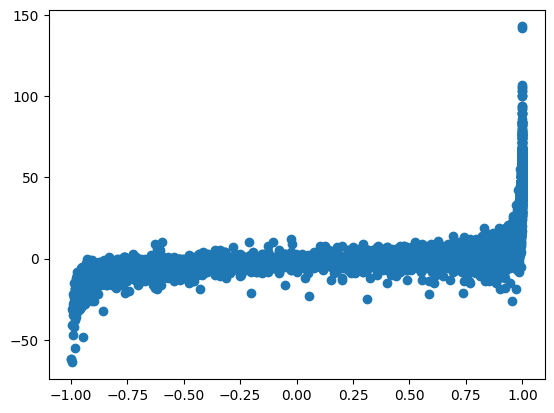

In [ ]:
plt.scatter(review_table['compound'], review_table['afinn_score'])

([<matplotlib.axis.XTick at 0x79b32116ea40>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

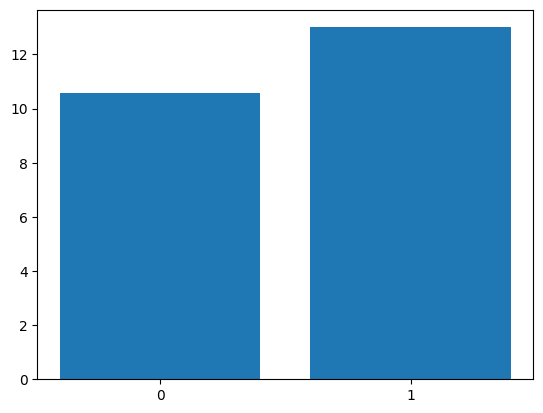

In [ ]:
average = review_table.groupby('is_open')['afinn_score'].mean().reset_index()
plt.bar(average['is_open'], average['afinn_score'])
plt.xticks([0, 1])

In [ ]:
def count_RestaurantsPriceRange2(row):
    return sum(1 for key in row.keys() if key == 'RestaurantsPriceRange2')

# Apply the function to each row
review_table['RestaurantsPriceRange2_count'] = review_table.apply(count_RestaurantsPriceRange2, axis=1)

# Display the result
print(review_table[['RestaurantsPriceRange2_count']])

       RestaurantsPriceRange2_count
0                                 1
1                                 1
2                                 1
3                                 1
4                                 1
...                             ...
16197                             1
16198                             1
16199                             1
16200                             1
16201                             1

[16202 rows x 1 columns]
